<a href="https://colab.research.google.com/drive/1jPe71IfxYrfBIY5RbKqtdq0jVHQQPz_r?authuser=0#scrollTo=dDAGa9oOCdE-" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 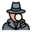 Análisis de delitos en la ciudad de Buenos Aires en el año 2022.
### Fuente https://data.buenosaires.gob.ar/dataset/delitos/resource/4b4eccf8-0c91-469f-815a-8dace9efa39f
##  Introducción
El presente proyecto tiene como objetivo analizar un dataset que contiene información detallada sobre delitos ocurridos durante el año 2022. Este conjunto de datos recopila diversos aspectos clave de los incidentes registrados, incluyendo la fecha, ubicación geográfica, tipo de delito, uso de armas, empleo de motocicletas en los actos delictivos y la franja horaria en la que sucedieron. La riqueza de estos datos permite realizar un análisis profundo de los patrones delictivos, identificar tendencias y evaluar posibles factores que influyen en la ocurrencia de estos eventos.
El análisis de este dataset es crucial para comprender la dinámica del crimen en diferentes zonas. Con esta información, es posible detectar áreas con mayor incidencia delictiva, evaluar si existe una concentración de ciertos tipos de delitos en determinados lugares y analizar variaciones temporales en la frecuencia de los incidentes. Estos hallazgos pueden servir de base para la formulación de estrategias más eficaces en materia de seguridad pública, orientadas a la prevención y mitigación de riesgos.
Para abordar este análisis, se emplearán diversas técnicas de procesamiento de datos, exploración estadística y visualización. La representación gráfica de la información permitirá observar patrones ocultos en los datos y generar interpretaciones más accesibles. Se estudiará la distribución geográfica de los delitos mediante mapas interactivos, se analizarán tendencias a lo largo del tiempo y se examinará el impacto de variables como el uso de armas y vehículos en la comisión de los delitos. También se explorará la relación entre distintos factores y su influencia en los índices delictivos.
Este proyecto no solo busca obtener conocimientos sobre la situación del crimen en 2022, sino también generar información valiosa que pueda contribuir a la toma de decisiones informadas, tanto para diseñar políticas de seguridad como para mejorar la asignación de recursos en distintas jurisdicciones. La aplicación de un enfoque basado en datos permitirá obtener resultados más precisos y mejorar la comprensión de los fenómenos delictivos.


---

##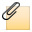  Hipótesis


- **1**: Los delitos aumentan en horarios nocturnos en comparación con el día.
- **2**: Las zonas con menor nivel socioeconómico presentan una mayor tasa de criminalidad.
- **3**: La cantidad de delitos es mayor en meses de verano debido a un mayor movimiento social.
- **4**: El uso de motos tiene relación directa con el uso de arma.








##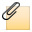 Descripción de las variables
*   id-mapa: Identificador único del incidente dentro del mapa.

*   anio: Año en el que ocurrió el incidente.

*   mes: Mes del incidente en formato de texto.

*   dia: Día de la semana en el que ocurrió el hecho.

*   fecha: Fecha completa del incidente en formato YYYY-MM-DD.

*   franja: Franja horaria en la que ocurrió el delito (posiblemente en horas
    del día).

*   tipo: Tipo general de delito (ej., Robo, Hurto).

*   subtipo: Categoría más específica dentro del tipo de delito (ej., Robo total, Robo automotor).

*   uso_arma: Indica si hubo uso de arma en el incidente (Sí/No).

*   uso_moto: Indica si se utilizó una moto en el delito (Sí/No).

*   barrio: Barrio en el que ocurrió el incidente.

*   comuna: Comuna de la ciudad en la que se registró el delito.

*   latitud: Coordenada geográfica de latitud del lugar del incidente.

*   longitud: Coordenada geográfica de longitud del lugar del incidente.

*   cantidad: Número de incidentes registrados




##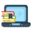 Cargamos las librerias que vamos a utilizar.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Cargamos el dataset y visualizamos las primeras filas.

In [3]:
url = "https://raw.githubusercontent.com/MarcosChaves81/Data-Science-I/refs/heads/main/delitos_2022.csv"
df = pd.read_csv(url)
df.head(10)

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2022,OCTUBRE,VIERNES,2022-10-14,3.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-34.584136,-58.454704,1
1,2,2022,OCTUBRE,JUEVES,2022-10-27,5.0,Robo,Robo total,NO,NO,BARRACAS,4.0,-34.645043,-58.373194,1
2,3,2022,NOVIEMBRE,MARTES,2022-11-29,0.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-34.589982,-58.446471,1
3,4,2022,NOVIEMBRE,LUNES,2022-11-28,0.0,Robo,Robo total,NO,NO,CHACARITA,15.0,-34.588320,-58.441232,1
4,5,2022,NOVIEMBRE,MIERCOLES,2022-11-30,3.0,Robo,Robo total,NO,NO,RECOLETA,2.0,-34.596748,-58.413609,1
5,6,2022,MAYO,MARTES,2022-05-17,5.0,Robo,Robo total,NO,NO,PARQUE AVELLANEDA,9.0,-34.640978,-58.480254,1
6,7,2022,AGOSTO,LUNES,2022-08-08,22.0,Robo,Robo total,NO,NO,PARQUE AVELLANEDA,9.0,-34.654528,-58.475954,1
7,8,2022,ENERO,JUEVES,2022-01-13,0.0,Hurto,Hurto total,NO,NO,NUÑEZ,13.0,-34.547388,-58.466093,1
8,9,2022,ENERO,VIERNES,2022-01-14,22.0,Robo,Robo automotor,SI,NO,NUÑEZ,13.0,-34.549508,-58.465083,1
9,10,2022,SEPTIEMBRE,MIERCOLES,2022-09-14,1.0,Robo,Robo total,SI,NO,BARRACAS,4.0,-34.652644,-58.379074,1


##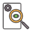 Realizamos una exploración de dataset para entender los datos, las variables y conseguir los resultados a las hipótesis planteadas, y tal vez encontrar información valiosa que no fue tenida en cuenta al plantear el proyecto.  

## Cantidad de registros del dataset:

In [4]:
cantidad = df["id-mapa"].count()
print(f"La cantidad de registros es {cantidad}")

La cantidad de registros es 140918


## Tipo de datos de las variables.

In [5]:
print(df.dtypes)

id-mapa       int64
anio          int64
mes          object
dia          object
fecha        object
franja      float64
tipo         object
subtipo      object
uso_arma     object
uso_moto     object
barrio       object
comuna      float64
latitud     float64
longitud    float64
cantidad      int64
dtype: object


## Busqueda de valores nulos y duplicados.

In [6]:
print(df.isnull().sum())
print(f"Cantidad de valores nulos {df.isnull().sum()}")
print("Cantidad de filas duplicadas:", df.duplicated().sum())

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja        47
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      2391
comuna      2393
latitud     2385
longitud    2385
cantidad       0
dtype: int64
Cantidad de valores nulos id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja        47
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      2391
comuna      2393
latitud     2385
longitud    2385
cantidad       0
dtype: int64
Cantidad de filas duplicadas: 0


## Eliminamos los regstros que tienen valores nulos o duplicados

In [7]:
df = df.drop_duplicates()
df = df.dropna()
print(df.isnull().sum())

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dtype: int64


## Convertimos el tipo de dato fecha para asegurarnos que estan en el formato adecuado

In [8]:
df["fecha"] = pd.to_datetime(df["fecha"])
df["franja"] = df["franja"].astype(int)

## Normalizamos nombres de columnas

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


## Ver distribución de valores únicos en columnas clave

In [10]:
print(df["tipo"].value_counts())
print(df["barrio"].value_counts())

tipo
Robo          56114
Hurto         54111
Lesiones       9622
Amenazas       9405
Vialidad       9185
Homicidios       87
Name: count, dtype: int64
barrio
PALERMO              11885
BALVANERA             9426
FLORES                7842
RECOLETA              6327
CABALLITO             6032
VILLA LUGANO          5682
ALMAGRO               5239
SAN NICOLAS           5058
BARRACAS              4590
CONSTITUCION          4554
BELGRANO              4196
VILLA CRESPO          3823
RETIRO                3637
MATADEROS             3264
MONSERRAT             3256
NUEVA POMPEYA         3092
PARQUE CHACABUCO      3079
VILLA SOLDATI         2799
VILLA URQUIZA         2785
LINIERS               2445
VILLA DEVOTO          2444
SAN CRISTOBAL         2388
SAAVEDRA              2385
PARQUE AVELLANEDA     2350
BOCA                  2315
PARQUE PATRICIOS      2193
NUÑEZ                 2140
BOEDO                 2001
SAN TELMO             1914
CHACARITA             1841
FLORESTA              1732
COLEG

## Ver información general

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 138524 entries, 0 to 140917
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id-mapa   138524 non-null  int64         
 1   anio      138524 non-null  int64         
 2   mes       138524 non-null  object        
 3   dia       138524 non-null  object        
 4   fecha     138524 non-null  datetime64[ns]
 5   franja    138524 non-null  int64         
 6   tipo      138524 non-null  object        
 7   subtipo   138524 non-null  object        
 8   uso_arma  138524 non-null  object        
 9   uso_moto  138524 non-null  object        
 10  barrio    138524 non-null  object        
 11  comuna    138524 non-null  float64       
 12  latitud   138524 non-null  float64       
 13  longitud  138524 non-null  float64       
 14  cantidad  138524 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 16.9+ MB
None


## Cantidad de delitos por barrio

In [12]:
# Identificar la franja horaria con más delitos por barrio
horario_max_delitos = df.groupby(["barrio", "franja"])["cantidad"].sum().reset_index()
horario_max_delitos = horario_max_delitos.loc[horario_max_delitos.groupby("barrio")["cantidad"].idxmax()]
print("Se visualizan los barrios con el horario de mayor tasa delictiva y su respectiva cantidad\n")
print(horario_max_delitos.to_string(index=False))

Se visualizan los barrios con el horario de mayor tasa delictiva y su respectiva cantidad

           barrio  franja  cantidad
        AGRONOMIA       0        31
          ALMAGRO       0       358
        BALVANERA      18       630
         BARRACAS       0       286
         BELGRANO      18       319
             BOCA      19       151
            BOEDO      12       133
        CABALLITO      18       397
        CHACARITA       0       119
          COGHLAN       8        44
       COLEGIALES       0       140
     CONSTITUCION      18       258
           FLORES      12       491
         FLORESTA      12       124
          LINIERS       0       153
        MATADEROS       8       218
        MONSERRAT      15       209
     MONTE CASTRO       0        85
    NUEVA POMPEYA       7       202
            NUÑEZ      17       138
          PALERMO      19       719
PARQUE AVELLANEDA       8       168
 PARQUE CHACABUCO       8       221
      PARQUE CHAS       9        43
 PARQUE P

In [13]:
# Contar delitos por barrio
delitos_por_barrio = df.groupby("barrio")["cantidad"].sum().reset_index()

# Calcular el total de delitos
total_delitos = delitos_por_barrio["cantidad"].sum()

# Agregar columna de porcentaje
delitos_por_barrio["porcentaje"] = (delitos_por_barrio["cantidad"] / total_delitos) * 100

print(delitos_por_barrio)

               barrio  cantidad  porcentaje
0           AGRONOMIA       454    0.327741
1             ALMAGRO      5239    3.782016
2           BALVANERA      9426    6.804597
3            BARRACAS      4590    3.313505
4            BELGRANO      4196    3.029078
5                BOCA      2315    1.671191
6               BOEDO      2001    1.444515
7           CABALLITO      6032    4.354480
8           CHACARITA      1841    1.329012
9             COGHLAN       557    0.402096
10         COLEGIALES      1638    1.182467
11       CONSTITUCION      4554    3.287517
12             FLORES      7842    5.661113
13           FLORESTA      1732    1.250325
14            LINIERS      2445    1.765037
15          MATADEROS      3264    2.356270
16          MONSERRAT      3256    2.350495
17       MONTE CASTRO      1170    0.844619
18      NUEVA POMPEYA      3092    2.232104
19              NUÑEZ      2140    1.544859
20            PALERMO     11885    8.579741
21  PARQUE AVELLANEDA      2350 

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Listando los 5 barrios con mas y con menos delitos.

In [14]:
# Ordenar el DataFrame por cantidad de delitos
delitos_ordenados = delitos_por_barrio.sort_values(by="cantidad", ascending=False)
top_5_barrios = delitos_ordenados.head(5)
bottom_5_barrios = delitos_ordenados.tail(5)
print("Cinco barrios con más delitos:")
print(top_5_barrios)
print("\nCinco barrios con menos delitos:")
print(bottom_5_barrios)

Cinco barrios con más delitos:
       barrio  cantidad  porcentaje
20    PALERMO     11885    8.579741
2   BALVANERA      9426    6.804597
12     FLORES      7842    5.661113
27   RECOLETA      6327    4.567440
7   CABALLITO      6032    4.354480

Cinco barrios con menos delitos:
           barrio  cantidad  porcentaje
43     VILLA REAL       567    0.409315
9         COGHLAN       557    0.402096
23    PARQUE CHAS       550    0.397043
26  PUERTO MADERO       507    0.366002
0       AGRONOMIA       454    0.327741


##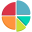 Gráfico

##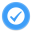 Hipótesis 1
En la siguiente gráfica se puede observar que la cantidad de delitos es mayor en zonas de alto poder adquisitivo, lo que refuta la hipótesis planteada.

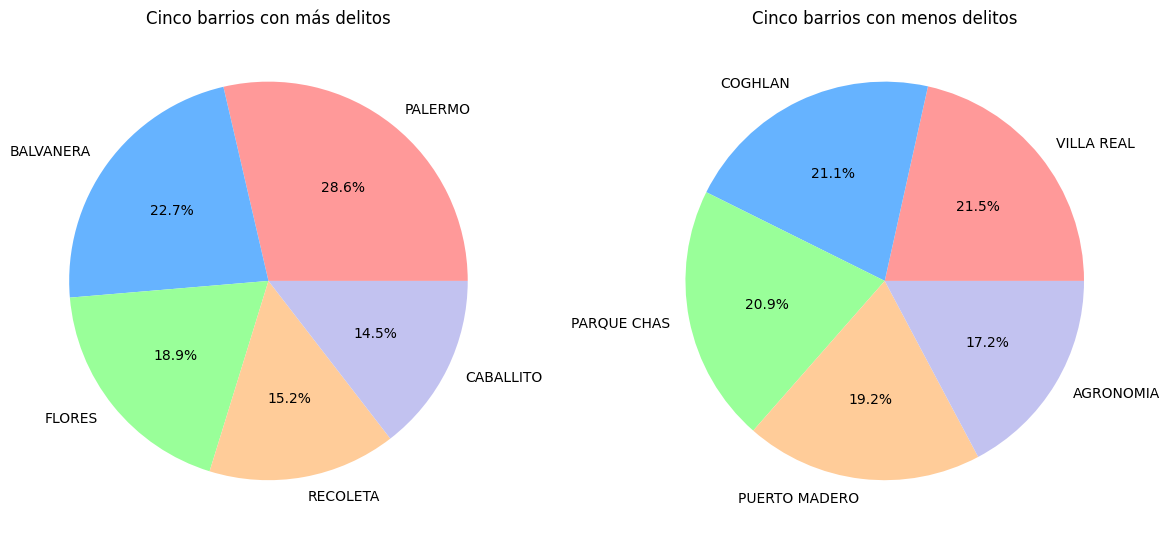

In [15]:
labels_top = top_5_barrios["barrio"]
sizes_top = top_5_barrios["cantidad"]
labels_bottom = bottom_5_barrios["barrio"]
sizes_bottom = bottom_5_barrios["cantidad"]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(sizes_top, labels=labels_top, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0"])
axs[0].set_title("Cinco barrios con más delitos")
axs[1].pie(sizes_bottom, labels=labels_bottom, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0"])
axs[1].set_title("Cinco barrios con menos delitos")
plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 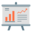Gráficos de cantidad de delitos

##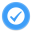 Hipótesis 2
En la segunda gráfica se puede ver que la mayor cantidad de delitos tiene relación con los horarios en donde hay mayor concentración de personas en la vía pública, se pueden ver picos a las 8, 12 , entre las 17 y las 21, como también un pico alto a las 00, este horario nocturno puede justificarse con un análisis de cantidad de delitos los dias viernes y sabados.

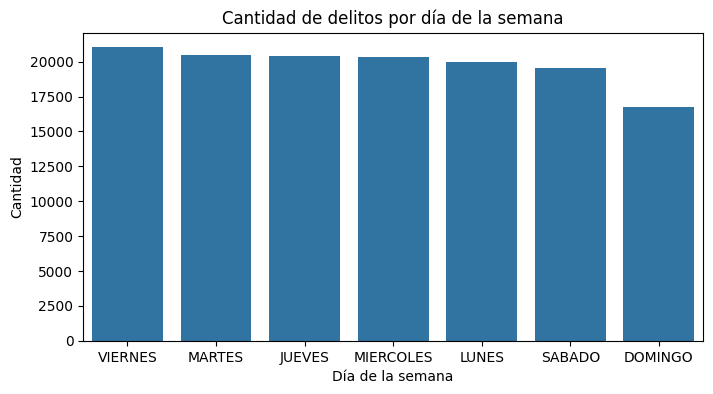

In [16]:
# Crear figura y gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x=df["dia"].value_counts().index, y=df["dia"].value_counts().values)

# Ajustes de etiquetas y título
plt.title("Cantidad de delitos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad")

plt.show()


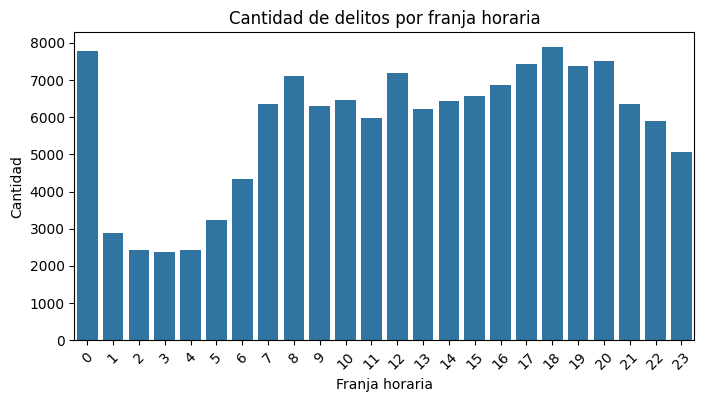

In [17]:
# Crear figura y gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x=df["franja"].value_counts().index, y=df["franja"].value_counts().values)

# Ajustes de etiquetas y título
plt.title("Cantidad de delitos por franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)  # Rotación para mejorar visibilidad

plt.show()


## Patrones de Criminalidad por Día de la Semana y Franja Horaria
El siguiente mapa de calor representa la distribución de delitos en función del día de la semana y la franja horaria en la que ocurrieron. La intensidad del color en la visualización permite identificar momentos de mayor concentración delictiva: los tonos más cálidos indican una mayor cantidad de incidentes registrados en ese intervalo, mientras que los tonos más fríos muestran períodos de menor actividad criminal.

Este tipo de análisis es clave para comprender patrones temporales en la criminalidad, ya que permite detectar si existen horarios específicos en los que ocurren más delitos y si ciertos días de la semana presentan una incidencia mayor. Esto resulta útil para la planificación de estrategias de prevención, distribución de recursos policiales y toma de decisiones sobre seguridad pública.

Si necesitas una interpretación más detallada basada en tendencias específicas dentro de los datos, dime y te ayudo a afinar el análisis

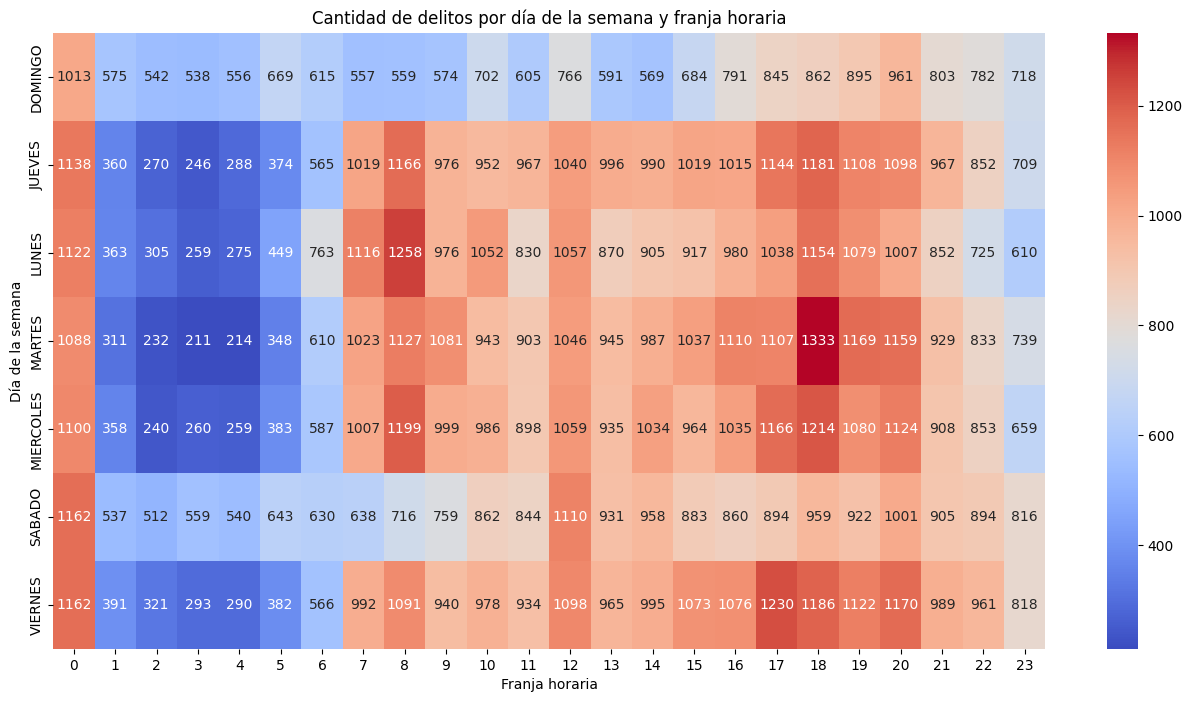

In [18]:
# Crear tabla de frecuencia
tabla_frecuencia = pd.crosstab(df["dia"], df["franja"])

# Visualización con heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(tabla_frecuencia, cmap="coolwarm", annot=True, fmt="d")

# Ajustes de la gráfica
plt.title("Cantidad de delitos por día de la semana y franja horaria")
plt.xlabel("Franja horaria")
plt.ylabel("Día de la semana")

plt.show()

##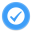 Hipótesis 3
En la primer grafica se puede apreciar que la cantidad tiene una curva ascendete que empieza en enero (mes de menor cantidad de delitos) y termina en diciembre (mes de mayor cantidad de delitos). Esta visualización determina que la tercer hipótesis planteada no es correcta. Se puede intuir que la pobación de a ciudad sufre una caída en época de vacaciones, debido a que muchas familias emigran a lugares turisticos.

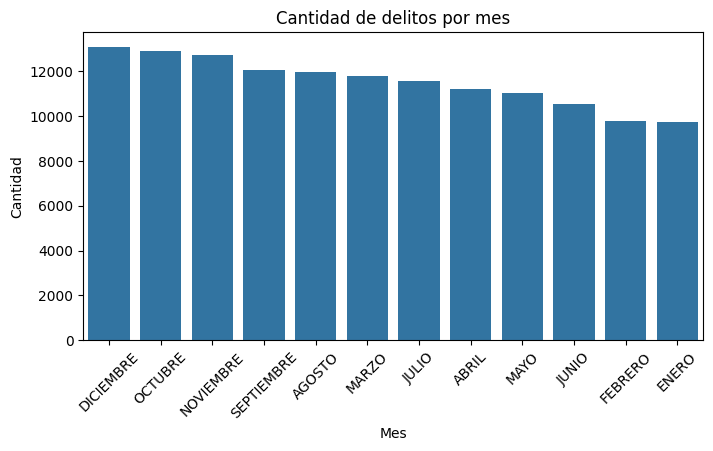

In [19]:
# Crear figura y gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x=df["mes"].value_counts().index, y=df["mes"].value_counts().values)

# Ajustes de etiquetas y título
plt.title("Cantidad de delitos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)  # Rotación para mejorar visibilidad

plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------

##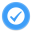 Hipótesis 4
Se puede apreciar que no hay una fuerte relación entre uso de arma y uso de moto. La mayor cantidad de delitos se realizan sin uso de arma.

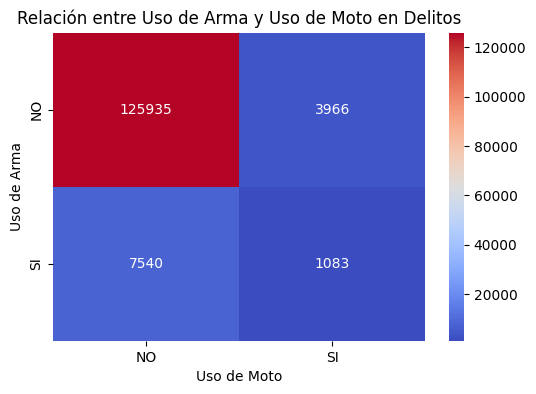

In [20]:
# Mapear valores numéricos a cadenas
df['uso_arma'] = df['uso_arma'].map({'NO': 0, 'SI': 1})
df['uso_moto'] = df['uso_moto'].map({'NO': 0, 'SI': 1})


tabla_frecuencia = pd.crosstab(df['uso_arma'], df['uso_moto'])

plt.figure(figsize=(6, 4))
sns.heatmap(tabla_frecuencia, annot=True, cmap='coolwarm', fmt="d", xticklabels=["NO", "SI"], yticklabels=["NO", "SI"])

plt.xlabel('Uso de Moto')
plt.ylabel('Uso de Arma')
plt.title('Relación entre Uso de Arma y Uso de Moto en Delitos')
plt.show()


##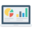 Gráficos de información complementaria.

##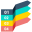 Análisis de la Evolución de los Delitos por Tipo
El siguiente gráfico de líneas muestra la evolución de los delitos a lo largo del tiempo, diferenciados por tipo. En el eje X, se representan los meses del año, mientras que en el eje Y se muestra la cantidad total de delitos registrados en cada periodo.

Cada línea del gráfico representa un tipo de delito y permite observar cómo su frecuencia varía mes a mes. Este análisis es útil para identificar tendencias y patrones estacionales en la criminalidad. Por ejemplo, es posible detectar si ciertos delitos aumentan en meses específicos o si hay una disminución en determinados periodos del año.

Gracias a esta visualización, se pueden realizar comparaciones entre las diferentes categorías delictivas y evaluar posibles factores que influyen en su comportamiento a lo largo del tiempo. Este enfoque es clave para la planificación de estrategias de prevención y seguridad pública.

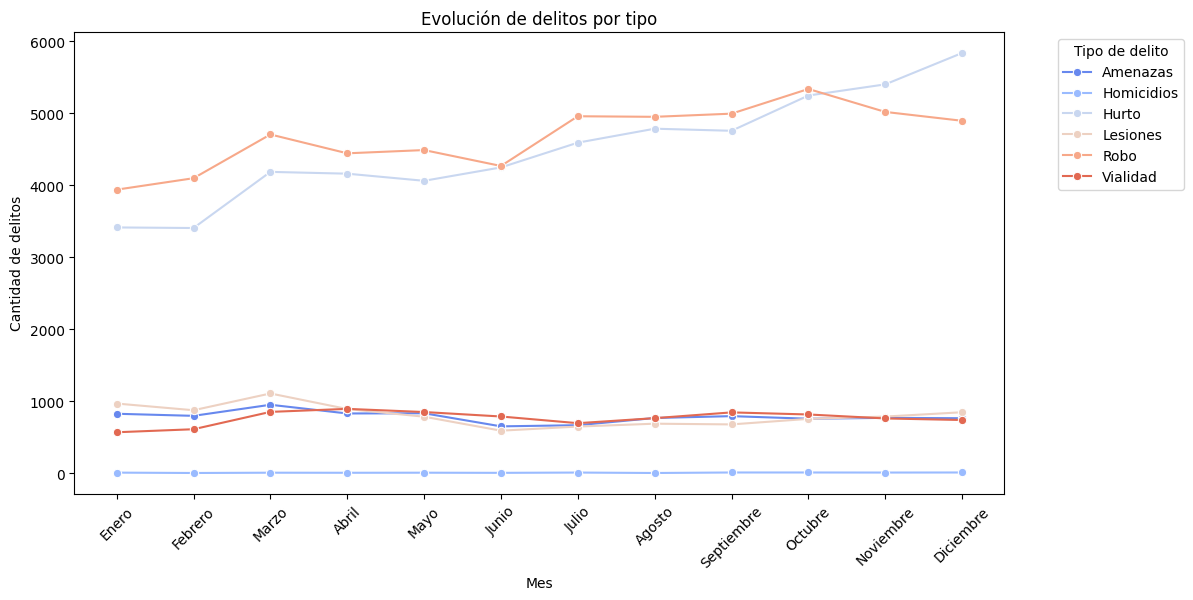

In [21]:

# Convertir la columna 'fecha' a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Extraer el número de mes de la fecha
df["mes_num"] = df["fecha"].dt.month

# Crear un diccionario con los nombres de los meses
meses_nombre = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

# Mapear los números de mes a su nombre
df["mes"] = df["mes_num"].map(meses_nombre)

# Agrupar los delitos por mes y tipo
df_agrupado = df.groupby(["mes_num", "mes", "tipo"])["cantidad"].sum().reset_index()

# Ordenar los datos por el número de mes para evitar problemas
df_agrupado = df_agrupado.sort_values(by="mes_num")

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agrupado, x="mes", y="cantidad", hue="tipo", marker="o", palette="coolwarm")

plt.xlabel("Mes")
plt.ylabel("Cantidad de delitos")
plt.title("Evolución de delitos por tipo")
plt.xticks(rotation=45)
plt.legend(title="Tipo de delito", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##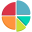 Análisis de la Distribución de los Delitos por Tipo
El siguiente gráfico de pastel muestra la proporción de delitos registrados en el conjunto de datos. Se puede observar que el robo (40.5%) es el delito más frecuente, seguido por el hurto (39.1%), lo que indica que los crímenes relacionados con la sustracción de bienes representan la mayor parte de los incidentes registrados.

Otras categorías, como lesiones (6.9%), amenazas (6.8%) y vialidad (6.6%), tienen una presencia significativa, aunque con menor incidencia. En contraste, los homicidios (0.1%) aparecen como la categoría menos frecuente dentro del análisis.

Este tipo de visualización es fundamental para identificar patrones delictivos y entender cuáles tipos de incidentes requieren mayor atención en términos de prevención y seguridad. Destacar la categoría con mayor incidencia en el gráfico permite una rápida identificación de las tendencias más relevantes y facilita la toma de decisiones estratégicas para mejorar la seguridad pública.

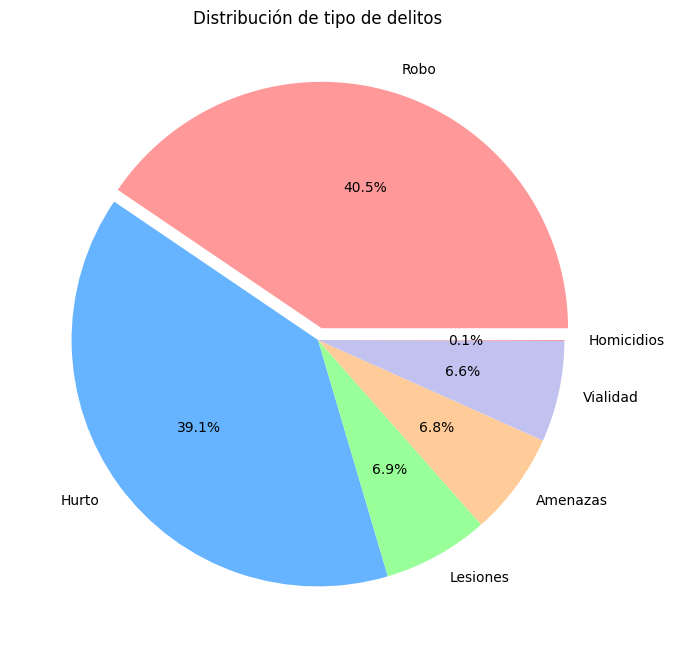

In [22]:
plt.figure(figsize=(8, 8))

valores = df["tipo"].value_counts()
etiquetas = valores.index

max_index = valores.idxmax()

explode_values = [0.05 if tipo == max_index else 0 for tipo in etiquetas]

valores.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0"],
    explode=explode_values)


plt.title("Distribución de tipo de delitos")
plt.ylabel("")
plt.show()


##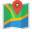 En el siguiente mapa se pueden visualizar los delitos de 'Femicidios' y 'Homicidios dolosos' ocurridos en el año 2022. Al hacer clic sobre un punto, se mostrarán detalles del tipo de delito y la fecha en que ocurrió.
### 🗺️ Leyenda de colores por subtipo de delito

  
- **Homicidios dolosos** →  `Rojo`  
- **Femicidios** →  `Azul`  



In [23]:
valores_ordenados = sorted(df["subtipo"].unique())
print(valores_ordenados)


['Amenazas', 'Femicidios', 'Homicidios dolosos', 'Hurto automotor', 'Hurto total', 'Lesiones Dolosas', 'Lesiones por siniestros viales', 'Muertes por siniestros viales', 'Robo automotor', 'Robo total']


In [ ]:
# Acá en el mapa pensé que ta vez estaría bueeno armar un filtro por delito y por fecha, pero no sé si sería demasiado.

# Convertir 'fecha' a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Filtrar solo los delitos de femicidios y homicidios en todo el año
df_filtrado = df[df["subtipo"].isin(["Femicidios", "Homicidios dolosos"])]

# Crear mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=12, width="1200px", height="900px")

# Asignar colores según el subtipo de delito
colores_subtipo = {
    "Femicidios": "blue",  # Azul para femicidios
    "Homicidios dolosos": "red"  # Rojo para homicidios
}

# Agregar los puntos filtrados con etiquetas emergentes
for _, row in df_filtrado.iterrows():
    folium.CircleMarker(
        location=[row["latitud"], row["longitud"]],
        radius=5,  # Ajuste del tamaño para mayor visibilidad
        popup=f'<b>Subtipo:</b> {row["subtipo"]}<br><b>Cantidad:</b> {row["cantidad"]}<br><b>Fecha:</b> {row["fecha"]}',
        tooltip=row["subtipo"],  # Muestra el subtipo cuando pasas el cursor
        color=colores_subtipo[row["subtipo"]],
        fill=True,
        fill_color=colores_subtipo[row["subtipo"]],
        fill_opacity=0.7
    ).add_to(mapa)

mapa
